<a href="https://colab.research.google.com/github/subhamchatterjee21/NETFLIX-clone/blob/main/Foodprj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/bananaset'

Resizing

In [ ]:
categories = ['fresh', 'spoiled', 'mixed']
images = []
labels = []

for category in categories:
    path = os.path.join(dataset_path, category) #constructs the path to the directory for the current category
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            resized_img = cv2.resize(img_array, (180, 180))
            images.append(resized_img)
            labels.append(class_num)
        except Exception as e:
            print(f"Error loading image: {img}, error: {e}")

X = np.array(images)
y = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
X_train_scaled = X_train / 255.0 #as 256 pixel colour values
X_test_scaled = X_test / 255.0


Augmentation

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
num_classes = 3

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)  # Adjusted for three classes
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)


In [ ]:
model.evaluate(X_test_scaled, y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - accuracy: 0.9871 - loss: 0.0371


[0.042217906564474106, 0.9839034080505371]

In [ ]:
y_pred =model.predict(X_test_scaled)
y_pred[105]


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 359ms/step


array([ 27.969221, -25.047117,  -6.905963], dtype=float32)

In [ ]:
np.argmax(y_pred[105])

0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: fresh


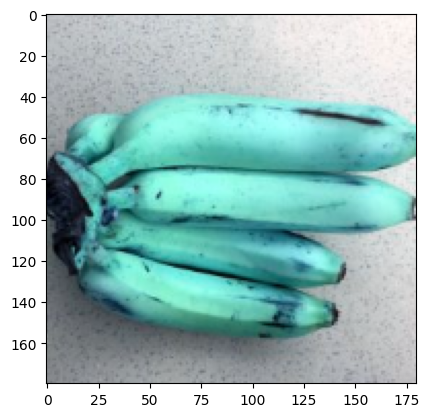

In [ ]:
import numpy as np


test_image = X_test_scaled[105]

# Add batch dimension to the image since the model expects a batch of images
test_image_expanded = np.expand_dims(test_image, axis=0)

predictions = model.predict(test_image_expanded)

# apply softmax to get probabilities
probabilities = tf.nn.softmax(predictions[0])

# Get the class with the highest probability
predicted_class = np.argmax(probabilities)

# Map the predicted class to the category name
#category_names = ['fresh', 'spoiled', 'mixed']
predicted_label = categories[predicted_class]

print(f"Prediction: {predicted_label}")
plt.imshow(X_test_scaled[105])
plt.show()



In [ ]:
# Save the trained model to Google Drive in Keras format
model.save('/content/drive/My Drive/banana_model.keras')
